# Load Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization'

In [3]:
# Import the orders data
weather_data = pd.read_csv(os.path.join(path, 'Data Sets', 'task2.3_weather_cleaned.csv'))
weather_data

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,1.00,1.0173,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,5,0.98,1.0114,0.04,1.14,0.0,4.9,3.8,5.9,5,0.67,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.94,1.0173,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,5,0.62,1.0114,0.04,0.00,0.0,3.4,2.8,4.9,6,0.72,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5

In [4]:
# Import the pleasant weather data
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'task2.3_pleasant_weather_cleaned.csv'))
pleasant_weather

,Unnamed: 0,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
weather_data = weather_data.reset_index(drop=True)
weather_data=weather_data.drop(columns=['Unnamed: 0'])
weather_data

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,1.00,1.0173,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,5,0.98,1.0114,0.04,1.14,0.0,4.9,3.8,5.9,5,0.67,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.94,1.0173,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,5,0.62,1.0114,0.04,0.00,0.0,3.4,2.8,4.9,6,0.72,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017

In [6]:
pleasant_weather = pleasant_weather.reset_index(drop=True)
pleasant_weather=pleasant_weather.drop(columns=['Unnamed: 0'])
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
pd.set_option('display.max_info_columns', 200) 

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 137 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    DATE                         22950 non-null  int64  
 1    MONTH                        22950 non-null  int64  
 2    BASEL_cloud_cover            22950 non-null  int64  
 3    BASEL_humidity               22950 non-null  float64
 4    BASEL_pressure               22950 non-null  float64
 5    BASEL_global_radiation       22950 non-null  float64
 6    BASEL_precipitation          22950 non-null  float64
 7    BASEL_sunshine               22950 non-null  float64
 8    BASEL_temp_mean              22950 non-null  float64
 9    BASEL_temp_min               22950 non-null  float64
 10   BASEL_temp_max               22950 non-null  float64
 11   BELGRADE_cloud_cover         22950 non-null  int64  
 12   BELGRADE_humidity            22950 non-null  float64
 13  

In [9]:
pleasant_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

# 2 Filter Data for Decade (2000 - 2009)

In [10]:
# Filter for data from the 2000s decade (2000-2009)
weather_data_decade = weather_data[(weather_data['DATE'] >= 20000101) & (weather_data['DATE'] < 20100101)]
pleasant_weather_decade = pleasant_weather[(pleasant_weather['DATE'] >= 20000101) & (pleasant_weather['DATE'] < 20100101)]

# Drop the DATE column for the features, as it is not necessary for the model
X = weather_data_decade.drop(columns=['DATE', 'MONTH'])
y = pleasant_weather_decade.drop(columns=['DATE'])

# Check the shape of the filtered data
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


# 3 Split Data

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Set Up Hyperparameters for Randomized Search

In [12]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform Randomized Search

In [13]:
# Using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters from Random Search:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Random Search: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini'}


# Evaluate the Optimized Model

In [17]:
from sklearn.metrics import classification_report

# Retrieve the best model
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))


Model Accuracy:  0.5745554035567716
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       190
           1       0.89      0.93      0.91       270
           2       0.87      0.98      0.92       255
           3       0.91      0.87      0.89       155
           4       0.91      0.86      0.89       158
           5       0.85      0.70      0.77       160
           6       0.92      0.83      0.87       147
           7       0.85      0.91      0.88       209
           8       0.92      0.92      0.92       160
           9       0.91      0.99      0.95       348
          10       0.96      0.91      0.94       169
          11       0.93      0.65      0.76       120
          12       0.00      0.00      0.00         0
          13       0.85      0.73      0.79       127
          14       1.00      0.02      0.04        44

   micro avg       0.90      0.87      0.89      2512
   macro avg       0.85      0.75      0.76 

# Visualize Feature Importances

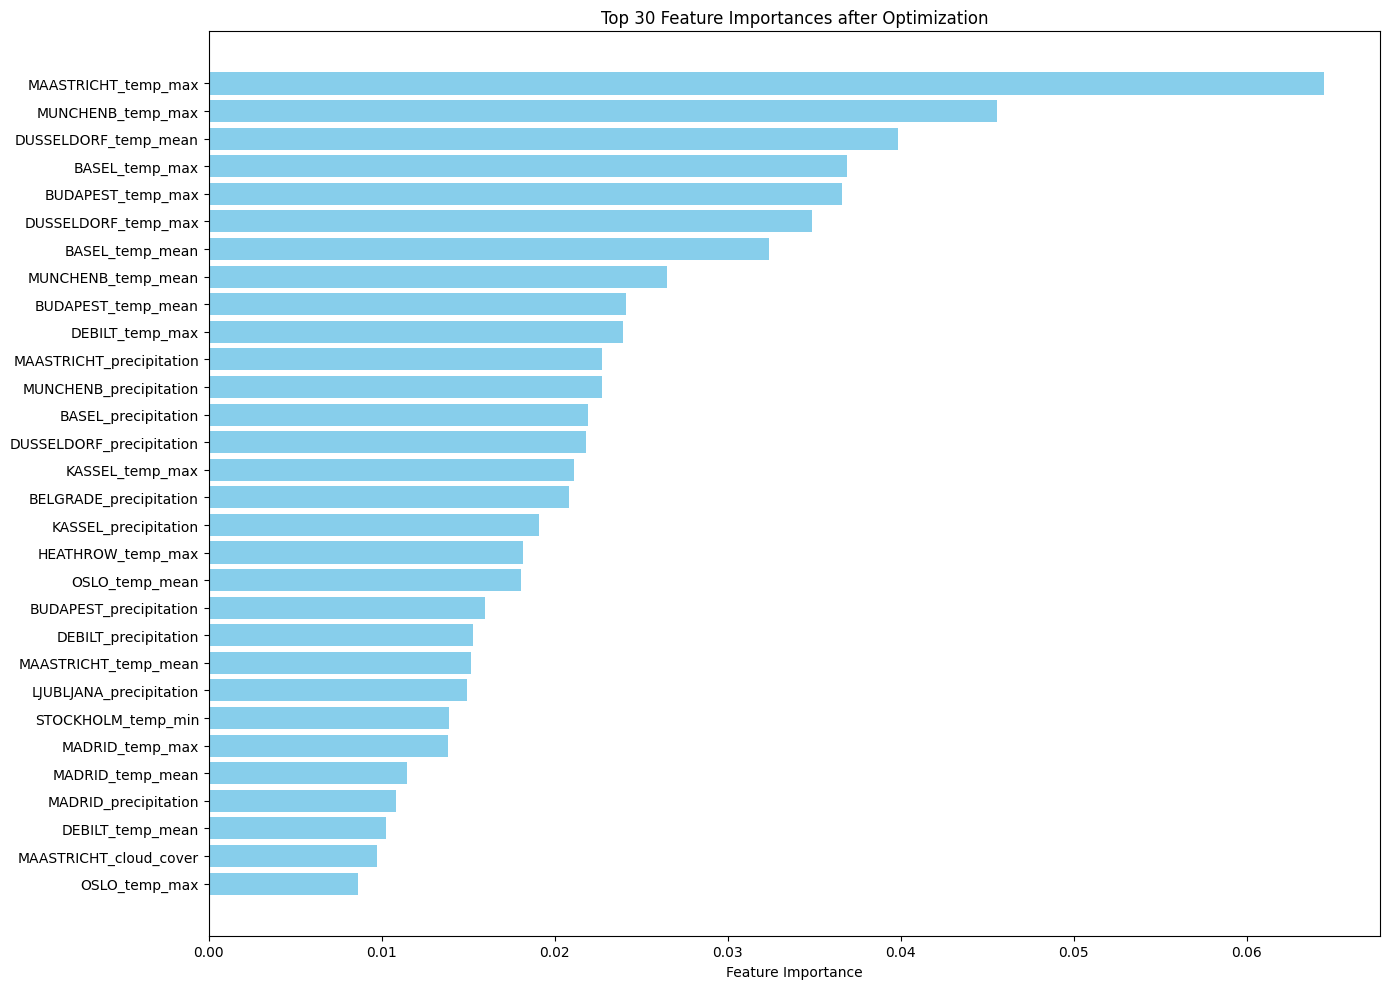

In [19]:
# Get feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Select top 30 features
top_n = 30
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Plot feature importances
plt.figure(figsize=(14, 10))
plt.title("Top 30 Feature Importances after Optimization")
plt.barh(range(top_n), top_importances, align='center', color='skyblue')
plt.yticks(range(top_n), top_features)
plt.gca().invert_yaxis()  # Highest at the top
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [21]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Feature MAASTRICHT_temp_max (0.0644749440576091)
2. Feature MUNCHENB_temp_max (0.04558198269604689)
3. Feature DUSSELDORF_temp_mean (0.039812088524625644)
4. Feature BASEL_temp_max (0.03687520277698521)
5. Feature BUDAPEST_temp_max (0.036591081816363114)
6. Feature DUSSELDORF_temp_max (0.03489078324681959)
7. Feature BASEL_temp_mean (0.03238833004355667)
8. Feature MUNCHENB_temp_mean (0.026500535474730937)
9. Feature BUDAPEST_temp_mean (0.02409121436725609)
10. Feature DEBILT_temp_max (0.02393946741179168)
11. Feature MAASTRICHT_precipitation (0.022733444101568592)
12. Feature MUNCHENB_precipitation (0.022728032494229274)
13. Feature BASEL_precipitation (0.021902678654475212)
14. Feature DUSSELDORF_precipitation (0.021791535555985973)
15. Feature KASSEL_temp_max (0.02109454168737507)
16. Feature BELGRADE_precipitation (0.020824417656149757)
17. Feature KASSEL_precipitation (0.01907064069281415)
18. Feature HEATHROW_temp_max (0.01819158369081093)
19. Feature OSLO_tem

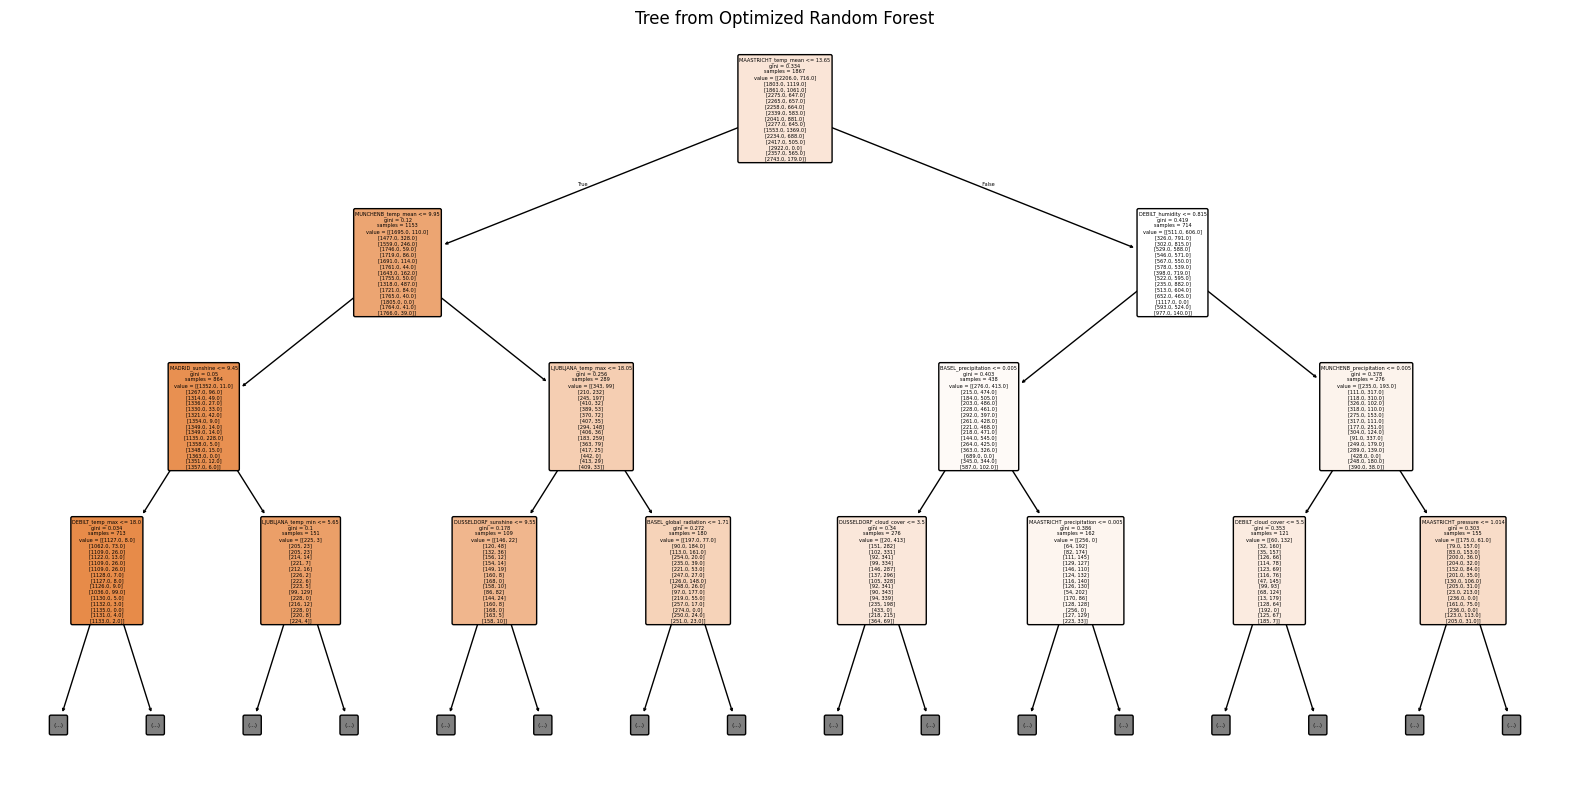

In [20]:
# Extract one tree from the optimized random forest
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], filled=True, rounded=True, max_depth=3, feature_names=features, class_names=['Not Pleasant', 'Pleasant'])
plt.title("Tree from Optimized Random Forest")
plt.show()